In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [21]:
data = pd.read_csv("creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [22]:
print(data.info())
print(data['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [23]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

In [24]:
X = data.drop('Class', axis=1)
y = data['Class']

In [26]:
smote = SMOTE(random_state=42)

# Combine X and y, drop rows with NaN values, then re-separate
combined_data = pd.concat([X, y], axis=1)
combined_data_cleaned = combined_data.dropna()
X_cleaned = combined_data_cleaned.drop('Class', axis=1)
y_cleaned = combined_data_cleaned['Class']

X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_cleaned)

print(y_resampled.value_counts())

Class
0.0    9926
1.0    9926
Name: count, dtype: int64


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [28]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
y_pred = model.predict(X_test)

In [30]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1991    1]
 [   0 1979]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1992
         1.0       1.00      1.00      1.00      1979

    accuracy                           1.00      3971
   macro avg       1.00      1.00      1.00      3971
weighted avg       1.00      1.00      1.00      3971



In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Accuracy (%):", accuracy * 100)

Accuracy: 0.9997481742634097
Accuracy (%): 99.97481742634096


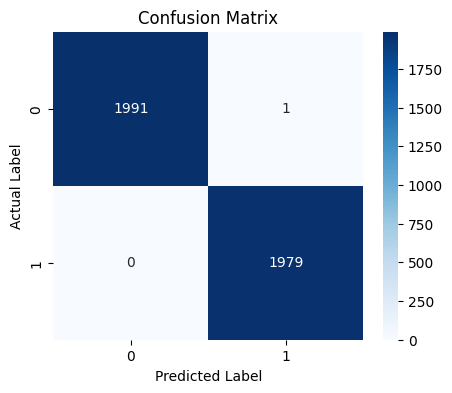

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [34]:
# Take one transaction from CSV (example: row index 10)
sample_input = X.iloc[[10]]

prediction = model.predict(sample_input)

if prediction[0] == 1:
    print("🚨 Fraudulent Transaction")
else:
    print("✅ Genuine Transaction")

probability = model.predict_proba(sample_input)

print("Probability of Genuine:", probability[0][0])
print("Probability of Fraud:", probability[0][1])


✅ Genuine Transaction
Probability of Genuine: 0.9999998012934449
Probability of Fraud: 1.9870655508880657e-07
